# Pandas intro class 05

Objective:
- Sampling
- Pandas for Timeseries data

## Sampling for your data

Options:
- random sample
- bootstrap sample
- weighted sample
- down/up sample based on specified column

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
college = pd.read_csv('data/college.csv')
college.shape

(7535, 27)

Random sample

In [12]:
# random sample
sampling_rate = 0.1
sample_1 = college.sample(frac=sampling_rate, replace=False, random_state=1)

Bootstrap sample

In [13]:
# boostrap sample
# frac can by >1 here
sample_2 = college.sample(frac=sampling_rate, replace=True, random_state=1)

In [15]:
sample_2['instnm'].value_counts()

United Education Institute-Huntington Park Campus    2
Strayer University-Allentown Campus                  2
Choffin Career  and Technical Center                 2
Advance Tech College                                 2
Keiser University-Tampa                              2
                                                    ..
LIM College                                          1
Empire Beauty School-Tucson                          1
Kaplan University-Lincoln Campus                     1
Universal Technical Institute of Texas Inc.          1
Avalon School of Cosmetology                         1
Name: instnm, Length: 709, dtype: int64

Weighted sample

In [27]:
# weighted sample
# sampling probability is proportional to weight column
sample_3 = college.sample(n=1000, weights='ugds', random_state=123)

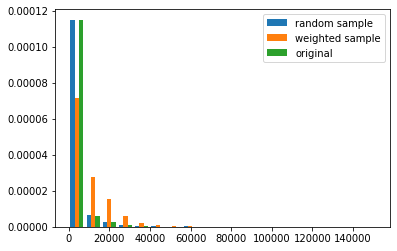

In [29]:
# verify data has more large value than original
bins = np.linspace(0, max(college['ugds']), 20)
plt.hist([sample_1['ugds'], sample_3['ugds'], college['ugds']], bins, 
         label=['random sample', 'weighted sample', 'original'],density=True)
plt.legend(loc='upper right')
plt.show()

Down-sample unwanted rows

In [64]:
college['hbcu'].value_counts()

0.0    7062
1.0     102
Name: hbcu, dtype: int64

In [71]:
college_hbcu = college[college['hbcu']==1]
college_non_hbcu = college[college['hbcu']==0]
college_hbcu.shape, college_non_hbcu.shape

((102, 27), (7062, 27))

In [72]:
ratio = 5
non_hbcu_size = college_hbcu.shape[0] * ratio
non_hbcu_sample = college_non_hbcu.sample(n=non_hbcu_size, replace=False, random_state=123)
non_hbcu_sample.shape

(510, 27)

In [73]:
downsampled_college = pd.concat([college_hbcu, non_hbcu_sample])
downsampled_college['hbcu'].value_counts()

0.0    510
1.0    102
Name: hbcu, dtype: int64

Up-sample wanted rows

In [68]:
ratio = 5
hbcu_size = round(college_non_hbcu.shape[0]/ratio)
hbcu_sample = college_hbcu.sample(n=hbcu_size, replace=True, random_state=123)
hbcu_sample.shape

(1487, 27)

In [74]:
upsampled_college = pd.concat([hbcu_sample, college_non_hbcu])
upsampled_college['hbcu'].value_counts()

0.0    7062
1.0    1487
Name: hbcu, dtype: int64

You can also use `sklearn.utils.resample` to sample data directly.

## Time series data analysis

Pandas has an intro: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

We will cover some simple methods:
- create a date range
- convert string data to a timestamp
- work with timestamp data
- index and slice your time series data in a data frame
- resample your time series for different time period aggregates/summary statistics
- compute a rolling statistic/window function such as a rolling average
- filling missing
- quick differencing

In [30]:
from datetime import datetime

#### Create a date range

In [32]:
date_rng = pd.date_range(start='5/1/2020', end='5/12/2020', freq='H')
date_rng

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 01:00:00',
               '2020-05-01 02:00:00', '2020-05-01 03:00:00',
               '2020-05-01 04:00:00', '2020-05-01 05:00:00',
               '2020-05-01 06:00:00', '2020-05-01 07:00:00',
               '2020-05-01 08:00:00', '2020-05-01 09:00:00',
               ...
               '2020-05-11 15:00:00', '2020-05-11 16:00:00',
               '2020-05-11 17:00:00', '2020-05-11 18:00:00',
               '2020-05-11 19:00:00', '2020-05-11 20:00:00',
               '2020-05-11 21:00:00', '2020-05-11 22:00:00',
               '2020-05-11 23:00:00', '2020-05-12 00:00:00'],
              dtype='datetime64[ns]', length=265, freq='H')

In [33]:
# create df
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))
df.head()

,date,data
0,2020-05-01 00:00:00,16
1,2020-05-01 01:00:00,16
2,2020-05-01 02:00:00,34
3,2020-05-01 03:00:00,76
4,2020-05-01 04:00:00,53


#### Convert the data frame index to a datetime index

In [34]:
# convert index
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

,data
datetime,
2020-05-01 00:00:00,16
2020-05-01 01:00:00,16
2020-05-01 02:00:00,34
2020-05-01 03:00:00,76
2020-05-01 04:00:00,53


#### Convert string data to a timestamp

In [35]:
# generate fake strings to parse
string_date_rng = [str(x) for x in date_rng]
type(string_date_rng[0])

str

In [36]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 01:00:00',
               '2020-05-01 02:00:00', '2020-05-01 03:00:00',
               '2020-05-01 04:00:00', '2020-05-01 05:00:00',
               '2020-05-01 06:00:00', '2020-05-01 07:00:00',
               '2020-05-01 08:00:00', '2020-05-01 09:00:00',
               ...
               '2020-05-11 15:00:00', '2020-05-11 16:00:00',
               '2020-05-11 17:00:00', '2020-05-11 18:00:00',
               '2020-05-11 19:00:00', '2020-05-11 20:00:00',
               '2020-05-11 21:00:00', '2020-05-11 22:00:00',
               '2020-05-11 23:00:00', '2020-05-12 00:00:00'],
              dtype='datetime64[ns]', length=265, freq=None)

In [37]:
# other formats work too as long as you specify
string_date_rng_2 = ['June-01-2018', 'June-02-2018', 'June-03-2018']
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2

[datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 6, 2, 0, 0),
 datetime.datetime(2018, 6, 3, 0, 0)]

#### Indexing and slicing

In [38]:
# index by day
df[df.index.day == 2]

,data
datetime,
2020-05-02 00:00:00,74
2020-05-02 01:00:00,73
2020-05-02 02:00:00,36
2020-05-02 03:00:00,70
2020-05-02 04:00:00,81
2020-05-02 05:00:00,11
2020-05-02 06:00:00,37
2020-05-02 07:00:00,56
2020-05-02 08:00:00,47


In [39]:
# index by date
df['2020-05-02']

,data
datetime,
2020-05-02 00:00:00,74
2020-05-02 01:00:00,73
2020-05-02 02:00:00,36
2020-05-02 03:00:00,70
2020-05-02 04:00:00,81
2020-05-02 05:00:00,11
2020-05-02 06:00:00,37
2020-05-02 07:00:00,56
2020-05-02 08:00:00,47


In [42]:
# slicing using time
df['2020-05-04 12:00:00':'2020-05-05 00:00:00']

,data
datetime,
2020-05-04 12:00:00,85
2020-05-04 13:00:00,59
2020-05-04 14:00:00,45
2020-05-04 15:00:00,24
2020-05-04 16:00:00,35
2020-05-04 17:00:00,45
2020-05-04 18:00:00,30
2020-05-04 19:00:00,28
2020-05-04 20:00:00,94


#### Resample the data at a different frequency
Note: differnet concept as the sampling we discussed before

In [43]:
df.resample('D').mean()

,data
datetime,
2020-05-01,49.958333
2020-05-02,41.250000
2020-05-03,42.041667
2020-05-04,43.833333
2020-05-05,54.083333
2020-05-06,54.416667
2020-05-07,49.875000
2020-05-08,56.083333
2020-05-09,44.166667


In [52]:
# you can iterate through resampled data
resampled = df.resample('2W')

for name, group in resampled:
    print("Group: ", name)
    print("-" * 27)
    print(group, end="\n\n")

Group:  2020-05-03 00:00:00
---------------------------
                     data  rolling_avg  first_diff  second_diff  \
datetime                                                          
2020-05-01 00:00:00    16          NaN         NaN          NaN   
2020-05-01 01:00:00    16          NaN         0.0          NaN   
2020-05-01 02:00:00    34    22.000000        18.0         18.0   
2020-05-01 03:00:00    76    42.000000        42.0         24.0   
2020-05-01 04:00:00    53    54.333333       -23.0        -65.0   
...                   ...          ...         ...          ...   
2020-05-03 19:00:00    46    43.000000        44.0        123.0   
2020-05-03 20:00:00    27    25.000000       -19.0        -63.0   
2020-05-03 21:00:00    80    51.000000        53.0         72.0   
2020-05-03 22:00:00    83    63.333333         3.0        -50.0   
2020-05-03 23:00:00     6    56.333333       -77.0        -80.0   

                     bf_rolling_avg  
datetime                          

#### Window function (e.g. rolling average)
Specify `win_type` for advanced aggregation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html#pandas.Series.rolling

In [45]:
df['rolling_avg'] = df.rolling(3).mean()
df.head()

,data,rolling_avg
datetime,,
2020-05-01 00:00:00,16,NaN
2020-05-01 01:00:00,16,NaN
2020-05-01 02:00:00,34,22.000000
2020-05-01 03:00:00,76,42.000000
2020-05-01 04:00:00,53,54.333333


In [60]:
df['data'].rolling('2d').sum()

datetime
2020-05-01 00:00:00      16.0
2020-05-01 01:00:00      32.0
2020-05-01 02:00:00      66.0
2020-05-01 03:00:00     142.0
2020-05-01 04:00:00     195.0
                        ...  
2020-05-11 20:00:00    2576.0
2020-05-11 21:00:00    2529.0
2020-05-11 22:00:00    2587.0
2020-05-11 23:00:00    2608.0
2020-05-12 00:00:00    2646.0
Name: data, Length: 265, dtype: float64

#### Quick difference

In [48]:
df['first_diff'] = df['data'].diff()
df['second_diff'] = df['first_diff'].diff()
df.head()

,data,rolling_avg,first_diff,second_diff
datetime,,,,
2020-05-01 00:00:00,16,NaN,NaN,NaN
2020-05-01 01:00:00,16,NaN,0.0,NaN
2020-05-01 02:00:00,34,22.000000,18.0,18.0
2020-05-01 03:00:00,76,42.000000,42.0,24.0
2020-05-01 04:00:00,53,54.333333,-23.0,-65.0


#### Filling missing

In [49]:
# be aware of time traveling
df['bf_rolling_avg'] = df['rolling_avg'].fillna(method='backfill')
df.head()

,data,rolling_avg,first_diff,second_diff,bf_rolling_avg
datetime,,,,,
2020-05-01 00:00:00,16,NaN,NaN,NaN,22.000000
2020-05-01 01:00:00,16,NaN,0.0,NaN,22.000000
2020-05-01 02:00:00,34,22.000000,18.0,18.0,22.000000
2020-05-01 03:00:00,76,42.000000,42.0,24.0,42.000000
2020-05-01 04:00:00,53,54.333333,-23.0,-65.0,54.333333
